In [76]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [77]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/BHOPAL_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 8799, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height    (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [78]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [79]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

           0        1        2        3        4        5        6        7   \
0     95600.0  92500.0  85000.0  70000.0  50000.0  40000.0  30000.0      NaN   
1     95500.0  92500.0  92200.0  85600.0  85000.0  76200.0  70000.0  64400.0   
2     92500.0  85900.0  85000.0  83000.0  71200.0  70000.0  63000.0  60000.0   
3     95600.0  92500.0  85000.0  70000.0  50000.0  40000.0  30000.0      NaN   
4     95400.0  92500.0  92200.0  85000.0  83200.0  80400.0  77400.0  74800.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8794  95400.0  92900.0  92500.0  90900.0  85000.0  78200.0  71500.0  70200.0   
8795  95300.0  92500.0  85000.0  70000.0  50000.0  40000.0  30000.0      NaN   
8796  95300.0  92500.0  91100.0  85000.0  70000.0  68300.0  65600.0  62500.0   
8797  95400.0  92500.0      NaN      NaN      NaN      NaN      NaN      NaN   
8798  95500.0  92500.0  88200.0  85000.0  71500.0  70000.0  66800.0  65900.0   

           8        9        10       1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,95600.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95500.0,92500.0,92200.0,85600.0,85000.0,76200.0,70000.0,64400.0,60000.0,57800.0,51300.0,50000.0,48500.0,40000.0,33600.0,NaN,NaN,NaN,NaN,NaN
2,92500.0,85900.0,85000.0,83000.0,71200.0,70000.0,63000.0,60000.0,58600.0,52000.0,50000.0,49400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95600.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95400.0,92500.0,92200.0,85000.0,83200.0,80400.0,77400.0,74800.0,70000.0,62700.0,62000.0,60000.0,52300.0,50000.0,45900.0,40000.0,36300.0,30000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,95400.0,92900.0,92500.0,90900.0,85000.0,78200.0,71500.0,70200.0,70000.0,69800.0,69400.0,67800.0,66900.0,66200.0,63000.0,55600.0,54200.0,50000.0,46400.0,40000.0
8795,95300.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8796,95300.0,92500.0,91100.0,85000.0,70000.0,68300.0,65600.0,62500.0,58900.0,58300.0,54800.0,51400.0,50000.0,40000.0,30000.0,27100.0,NaN,NaN,NaN,NaN
8797,95400.0,92500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


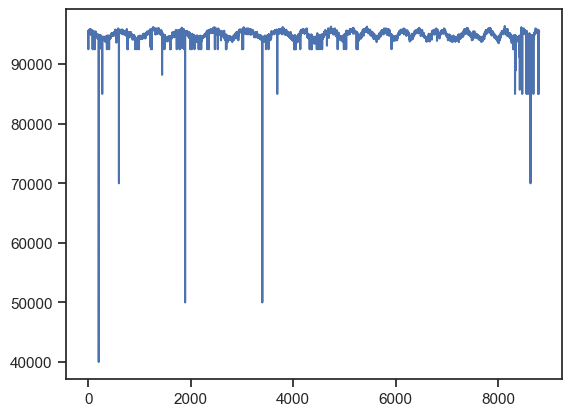

In [80]:
plt.plot(table1[0])

In [81]:
prior.q

<xarray.DataArray 'q' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [82]:
prior.temp

<xarray.DataArray 'temp' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-30T09:00:00
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  temperature
    units:      K

In [83]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\BHOPAL_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


             Test_time
0     01-01-2000 00:00
1     01-01-2000 12:00
2     02-01-2000 00:00
3     03-01-2000 00:00
4     03-01-2000 11:00
...                ...
8794  29-11-2023 00:00
8795  29-11-2023 12:00
8796  30-11-2023 00:00
8797  30-11-2023 12:00
8798  01-12-2023 00:00

[8799 rows x 1 columns]


In [84]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\BHOPAL_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 8799, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2023-12-01
  * height    (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 9.56e+04 9.25e+04 ... 4.28e+04 4.2e+04

In [85]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                    time
0    2000-01-01 00:00:00
1    2000-01-01 12:00:00
2    2000-01-02 00:00:00
3    2000-01-03 00:00:00
4    2000-01-03 11:00:00
...                  ...
8794 2023-11-29 00:00:00
8795 2023-11-29 12:00:00
8796 2023-11-30 00:00:00
8797 2023-11-30 12:00:00
8798 2023-12-01 00:00:00

[8799 rows x 1 columns]


,time
0,2000-01-01 00:00:00
1,2000-01-01 12:00:00
2,2000-01-02 00:00:00
3,2000-01-03 00:00:00
4,2000-01-03 11:00:00
...,...
8794,2023-11-29 00:00:00
8795,2023-11-29 12:00:00
8796,2023-11-30 00:00:00
8797,2023-11-30 12:00:00


In [86]:
prior.time

<xarray.DataArray 'time' (time: 8799)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T12:00:00.000000000',
       '2000-01-02T00:00:00.000000000', ..., '2023-11-30T00:00:00.000000000',
       '2023-11-30T12:00:00.000000000', '2023-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-01

In [87]:
prior.q

<xarray.DataArray 'q' (time: 8799, height: 20)>
[175980 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-01
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [88]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


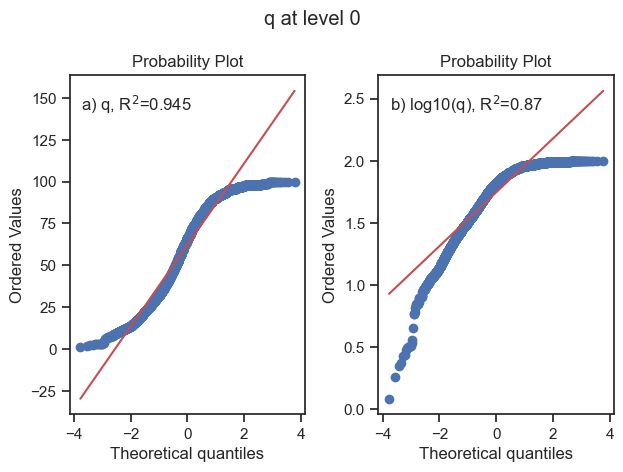

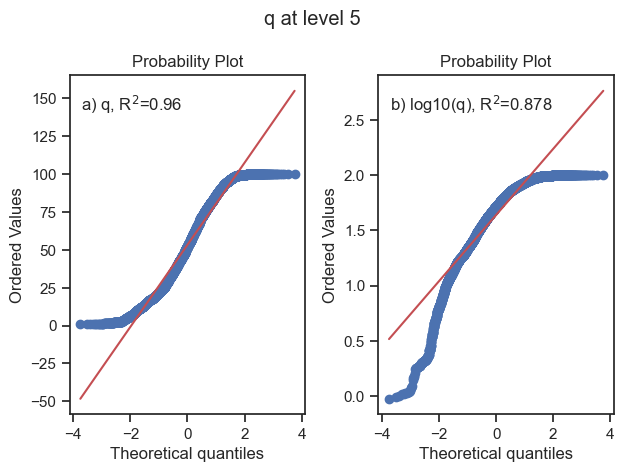

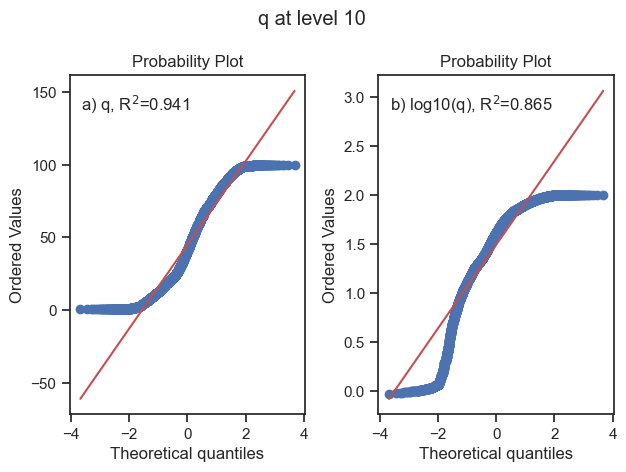

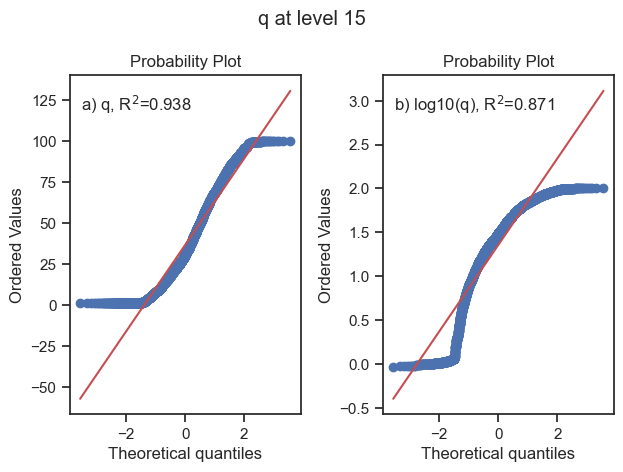

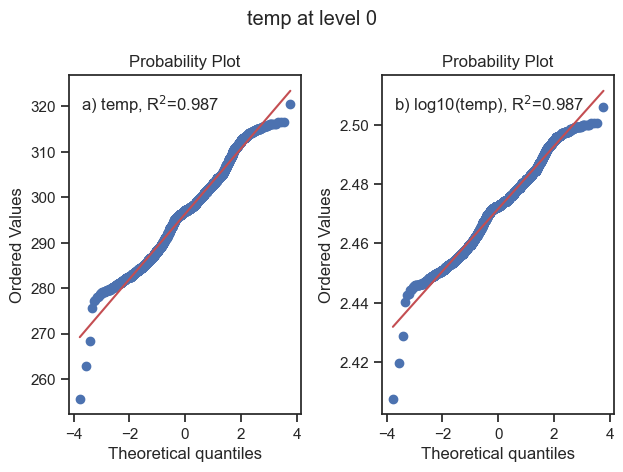

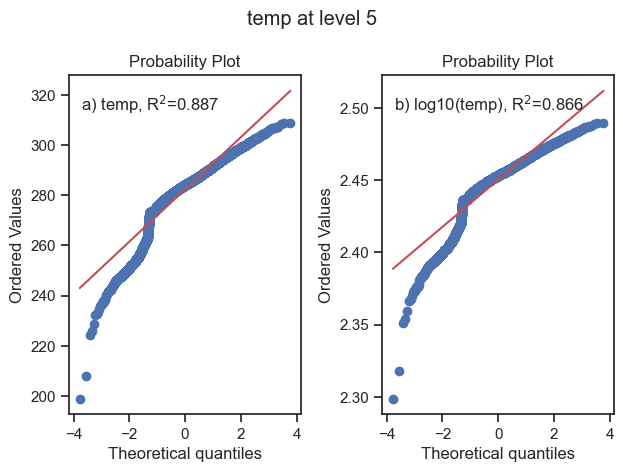

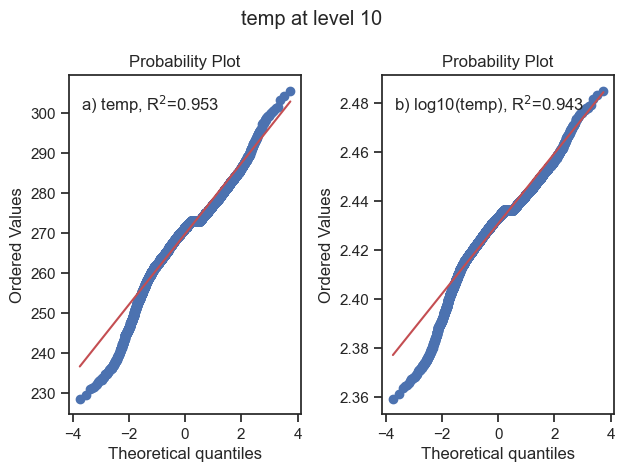

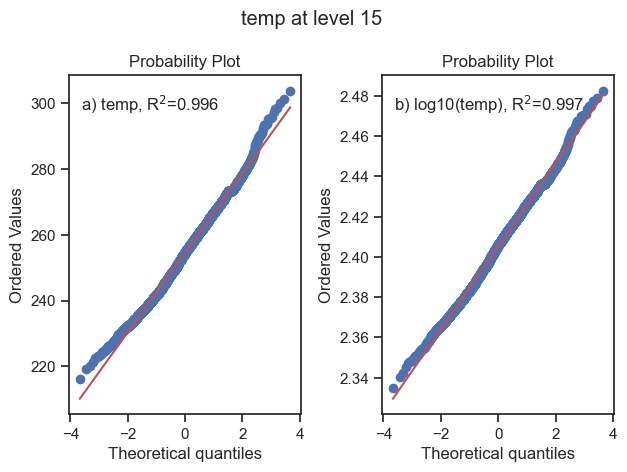

In [89]:
for var in ['q', 'temp']:
    for h in range(0, 20, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [90]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [91]:
prior['q']

<xarray.DataArray 'q' (time: 8799, height: 20)>
array([[1.76378602, 1.49879674, 1.54344486, ...,        nan,        nan,
               nan],
       [1.58346772, 1.25124114, 1.21546669, ...,        nan,        nan,
               nan],
       [1.46541405, 1.24228312, 1.06260911, ...,        nan,        nan,
               nan],
       ...,
       [1.964111  , 1.94255719, 1.92055124, ...,        nan,        nan,
               nan],
       [1.97897247, 1.87270156,        nan, ...,        nan,        nan,
               nan],
       [1.97825928, 1.96708761, 1.92006116, ..., 1.20774371, 1.5831737 ,
        1.16409152]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-01
  * height   (height) float64 0.0 194.9 539.0 ... 7.646e+03 7.815e+03 7.855e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [92]:
profileTT = np.array([
    '2018-07-31T00:00:00.000000000', '2007-06-12T00:00:00.000000000',
    '2023-09-27T00:00:00.000000000', '2012-08-24T00:00:00.000000000',
     ],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# 02-02-2000 00:00
# 02-02-2000 12:00
# 03-02-2000 00:00
# 03-02-2000 12:00
# 04-02-2000 00:00
# 04-02-2000 12:00
# 05-02-2000 00:00
# 05-02-2000 12:00

#    2008-10-14 00:00:00
#   2004-05-29 12:00:00
#   2015-09-21 12:00:00
#   2000-07-22 12:00:00
#    2000-06-13 12:00:00
#      2018-03-10 12:00:00
# 2008-08-14 12:00:00 

# '2008-08-14T12:00:00.000000000',


# profileTT = np.array([
#     '2017-12-21T12:00:00.000000000', '2004-05-23T00:00:00.000000000',
#    '2001-06-06T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
#      ],dtype='datetime64[ns]')

20

In [93]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [94]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00194_q  00194_t   00539_q  00539_t  \
 time                                                                           
 2000-01-01 00:00:00  1.763786   285.15  1.498797   289.95  1.543445   284.95   
 2000-01-01 12:00:00  1.583468   296.55  1.251241   292.15  1.215467   291.75   
 2000-01-02 00:00:00  1.465414   289.55  1.242283   285.15  1.062609   284.95   
 2000-01-03 00:00:00  1.913394   281.15  1.324761   287.55       NaN   287.15   
 2000-01-03 11:00:00  1.544090   293.75  1.212293   291.25  1.176503   290.95   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-11-29 00:00:00  1.928304   291.15  1.958430   289.95  1.958494   290.15   
 2023-11-29 12:00:00  1.923284   296.75  1.888359   293.55  1.957780   287.95   
 2023-11-30 00:00:00  1.964111   290.35  1.942557   291.95  1.920551   292.15   
 2023-11-30 12:00:00  1.978972   296.55  1.872702   294.55       NaN      NaN   
 2023-12-01 00:00:00 

In [95]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [96]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

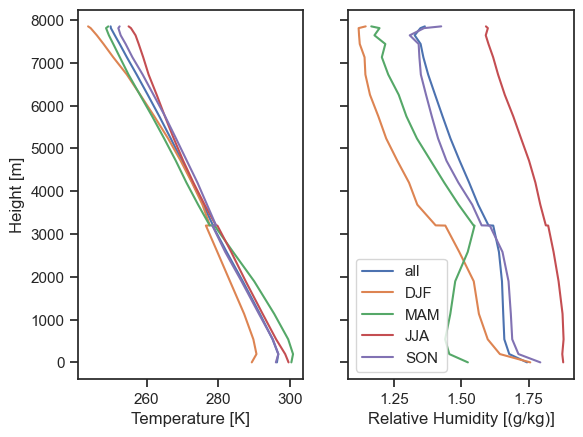

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

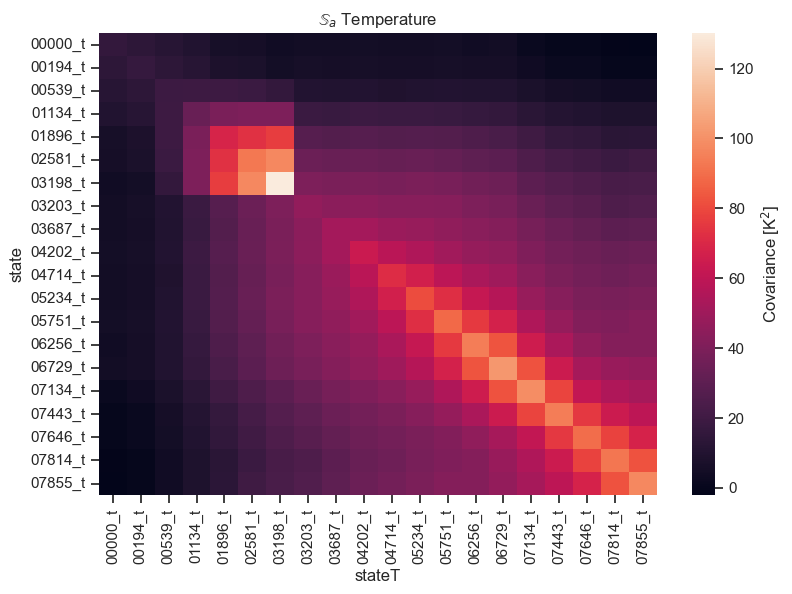

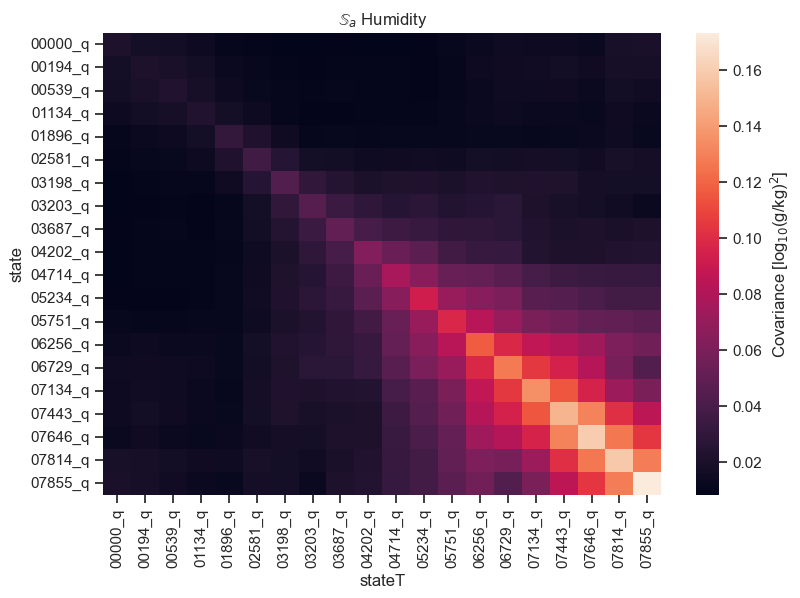

In [98]:
S_a = x_cov.sel(season='JJA').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [99]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,194.922456,539.012255,1134.632944,1896.844351,2581.096462,3198.768091,3203.262060,3687.155223,4202.306033,4714.098865,5234.892589,5751.334358,6256.685453,6729.239678,7134.907504,7443.648937,7646.201019,7814.739305,7855.378898
season,,,,,,,,,,,,,,,,,,,,
all,94910.039795,92824.786714,89287.709116,83522.590945,76880.623710,71216.226806,66465.284914,65477.460843,61779.056652,58090.486640,54608.036649,51226.993455,48013.162630,45010.414853,42318.178974,40090.275357,38452.647720,37396.082422,36582.560418,36461.926193
DJF,95474.667932,93122.628083,90135.595634,84944.698050,78895.471878,73908.808042,69507.260407,69142.509264,65708.881755,61884.312668,58111.703865,54244.469027,50399.033542,46761.280846,43445.765878,40330.260521,38045.516717,36607.677903,35343.095238,34778.594771
MAM,94819.215686,92777.892157,89684.460784,84231.909671,77715.982187,71604.624565,66472.292191,64767.895879,61216.322089,57661.399672,54400.944969,51044.809983,47778.132251,44684.592145,41897.041801,39943.522562,38467.447917,37637.995595,37198.260870,37717.327766
JJA,94256.222222,92410.142349,87823.097463,81387.935657,74173.629829,68249.457505,63253.348624,61716.675013,57611.200807,53881.832061,50612.066287,47711.477152,45102.903406,42810.262530,40779.564931,39367.484663,38229.147571,37448.581158,36520.509194,36066.854991
SON,95104.505632,92991.774530,89578.186377,83665.537432,76927.050905,71282.452431,66766.780969,66370.277909,62701.987695,59052.001907,55405.209841,51955.506391,48741.363403,45680.333154,43005.484247,40592.450416,39025.150150,37932.495345,37382.787879,37526.333333


In [100]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00194_t,00539_t,01134_t,01896_t,02581_t,03198_t,03203_t,03687_t,04202_t,...,04714_q,05234_q,05751_q,06256_q,06729_q,07134_q,07443_q,07646_q,07814_q,07855_q
time,,,,,,,,,,,,,,,,,,,,,
2007-06-12,302.75,303.75,302.75,299.75,299.75,298.55,297.35,294.95,292.95,290.75,...,1.499594,1.426032,1.502124,1.524393,1.747560,1.032378,0.922112,1.005073,0.988310,1.218707
2012-08-24,295.55,294.55,294.15,295.35,292.15,285.35,285.35,284.95,277.95,277.75,...,1.862134,1.834993,1.829289,1.757249,0.981099,1.238993,1.276533,1.701004,1.688280,1.392421
2018-07-31,297.15,296.95,294.35,295.15,293.35,293.35,284.55,283.35,287.55,287.75,...,1.616298,1.766029,1.870518,1.864084,1.641978,1.869308,1.740771,1.887507,1.603106,1.529335
2023-09-27,298.15,299.55,299.15,293.55,292.95,292.95,289.55,289.35,287.95,287.55,...,1.587068,1.762653,1.846702,1.679668,1.360764,0.894041,1.253721,1.468422,0.794161,0.636621


In [101]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00194_t,00539_t,01134_t,01896_t,02581_t,03198_t,03203_t,03687_t,04202_t,...,04714_q,05234_q,05751_q,06256_q,06729_q,07134_q,07443_q,07646_q,07814_q,07855_q
time,,,,,,,,,,,,,,,,,,,,,
2007-06-12,302.75,303.75,302.75,299.75,299.75,298.55,297.35,294.95,292.95,290.75,...,1.499594,1.426032,1.502124,1.524393,1.747560,1.032378,0.922112,1.005073,0.988310,1.218707
2012-08-24,295.55,294.55,294.15,295.35,292.15,285.35,285.35,284.95,277.95,277.75,...,1.862134,1.834993,1.829289,1.757249,0.981099,1.238993,1.276533,1.701004,1.688280,1.392421
2018-07-31,297.15,296.95,294.35,295.15,293.35,293.35,284.55,283.35,287.55,287.75,...,1.616298,1.766029,1.870518,1.864084,1.641978,1.869308,1.740771,1.887507,1.603106,1.529335
2023-09-27,298.15,299.55,299.15,293.55,292.95,292.95,289.55,289.35,287.95,287.55,...,1.587068,1.762653,1.846702,1.679668,1.360764,0.894041,1.253721,1.468422,0.794161,0.636621


In [102]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [103]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [104]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [105]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00194_q' '00194_t' '00539_q' '00539_t' '01134_q'
 '01134_t' '01896_q' '01896_t' '02581_q' '02581_t' '03198_q' '03198_t'
 '03203_q' '03203_t' '03687_q' '03687_t' '04202_q' '04202_t' '04714_q'
 '04714_t' '05234_q' '05234_t' '05751_q' '05751_t' '06256_q' '06256_t'
 '06729_q' '06729_t' '07134_q' '07134_t' '07443_q' '07443_t' '07646_q'
 '07646_t' '07814_q' '07814_t' '07855_q' '07855_t']


In [106]:
season = 'JJA'  #summer june july august
profile = np.datetime64('2007-06-12T00:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    302.750000
00194_t    303.750000
00539_t    302.750000
01134_t    299.750000
01896_t    299.750000
02581_t    298.550000
03198_t    297.350000
03203_t    294.950000
03687_t    292.950000
04202_t    290.750000
04714_t    290.150000
05234_t    287.950000
05751_t    282.750000
06256_t    279.950000
06729_t    276.950000
07134_t    276.550000
07443_t    273.150000
07646_t    273.350000
07814_t    271.450000
07855_t    270.250000
00000_q      1.793730
00194_q      1.768794
00539_q      1.767066
01134_q      1.842983
01896_q      1.706570
02581_q      1.703885
03198_q      1.701162
03203_q      1.695603
03687_q      0.948409
04202_q      1.685494
04714_q      1.499594
05234_q      1.426032
05751_q      1.502124
06256_q      1.524393
06729_q      1.747560
07134_q      1.032378
07443_q      0.922112
07646_q      1.005073
07814_q      0.988310
07855_q      1.218707
Name: 2007-06-12 00:00:00, dtype: float64

In [107]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

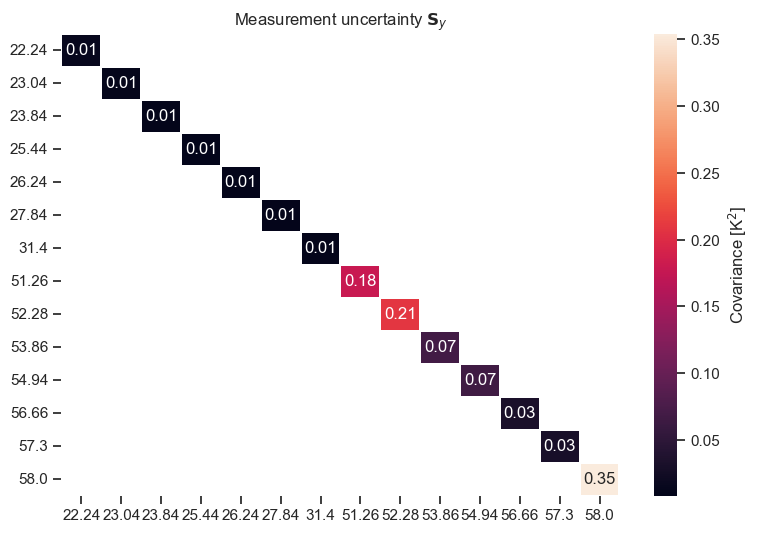

In [108]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [109]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars]
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars]

In [110]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [111]:
x_truth

state
00000_t    302.750000
00194_t    303.750000
00539_t    302.750000
01134_t    299.750000
01896_t    299.750000
02581_t    298.550000
03198_t    297.350000
03203_t    294.950000
03687_t    292.950000
04202_t    290.750000
04714_t    290.150000
05234_t    287.950000
05751_t    282.750000
06256_t    279.950000
06729_t    276.950000
07134_t    276.550000
07443_t    273.150000
07646_t    273.350000
07814_t    271.450000
07855_t    270.250000
00000_q      1.793730
00194_q      1.768794
00539_q      1.767066
01134_q      1.842983
01896_q      1.706570
02581_q      1.703885
03198_q      1.701162
03203_q      1.695603
03687_q      0.948409
04202_q      1.685494
04714_q      1.499594
05234_q      1.426032
05751_q      1.502124
06256_q      1.524393
06729_q      1.747560
07134_q      1.032378
07443_q      0.922112
07646_q      1.005073
07814_q      0.988310
07855_q      1.218707
Name: 2007-06-12 00:00:00, dtype: float64

In [112]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [113]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_17280\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [114]:
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [115]:
x_truth

state
00000_t    302.750000
00194_t    303.750000
00539_t    302.750000
01134_t    299.750000
01896_t    299.750000
02581_t    298.550000
03198_t    297.350000
03203_t    294.950000
03687_t    292.950000
04202_t    290.750000
04714_t    290.150000
05234_t    287.950000
05751_t    282.750000
06256_t    279.950000
06729_t    276.950000
07134_t    276.550000
07443_t    273.150000
07646_t    273.350000
07814_t    271.450000
07855_t    270.250000
00000_q      1.793730
00194_q      1.768794
00539_q      1.767066
01134_q      1.842983
01896_q      1.706570
02581_q      1.703885
03198_q      1.701162
03203_q      1.695603
03687_q      0.948409
04202_q      1.685494
04714_q      1.499594
05234_q      1.426032
05751_q      1.502124
06256_q      1.524393
06729_q      1.747560
07134_q      1.032378
07443_q      0.922112
07646_q      1.005073
07814_q      0.988310
07855_q      1.218707
Name: 2007-06-12 00:00:00, dtype: float64

In [116]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [117]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [118]:
oe_ref.doRetrieval()

0.43 s, iteration 1, degrees of freedom: 2.07 of 40, converged (x-space):  3.456
0.64 s, iteration 2, degrees of freedom: 2.07 of 40, done.  0.000


True

In [119]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.785148
00000_t    302.747483
00194_q      1.766747
00194_t    303.826288
00539_q      1.768581
00539_t    300.847104
01134_q      1.792837
01134_t    296.617737
01896_q      1.805035
01896_t    291.274455
dtype: float64
          00000_q   00000_t   00194_q   00194_t   00539_q    00539_t  \
00000_q  0.007007 -0.000256  0.003559  0.002654  0.003825  -0.019173   
00000_t -0.000256  0.013000  0.000127 -0.030349 -0.000182   0.043259   
00194_q  0.003559  0.000127  0.007400  0.001465  0.006794  -0.017427   
00194_t  0.002654 -0.030349  0.001465  0.096063  0.003768  -0.342737   
00539_q  0.003825 -0.000182  0.006794  0.003768  0.011130  -0.062184   
00539_t -0.019173  0.043259 -0.017427 -0.342737 -0.062184   6.247188   
01134_q  0.004109 -0.000013  0.006519  0.002600  0.009417  -0.039758   
01134_t -0.032016  0.066503 -0.027479 -0.485972 -0.065369   8.293069   
01896_q  0.003375  0.000285  0.005125  0.000112  0.007182   0.000513   
01896_t -0.022485  0.087384  0.006419 -0.6095

In [120]:
print(oe_ref.x_op_err[:10])

00000_q    0.083706
00000_t    0.114017
00194_q    0.086021
00194_t    0.309940
00539_q    0.105497
00539_t    2.499437
01134_q    0.125339
01134_t    4.812480
01896_q    0.164257
01896_t    7.791146
dtype: float64


In [121]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 2.0730618751486674
00000_q    1.106312e-03
00000_t    9.894657e-01
00194_q    1.755470e-03
00194_t    9.300470e-01
00539_q   -6.619199e-04
00539_t    1.485244e-01
01134_q   -4.629890e-06
01134_t    2.825241e-03
01896_q    1.208425e-08
01896_t    4.282826e-06
dtype: float64


In [122]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


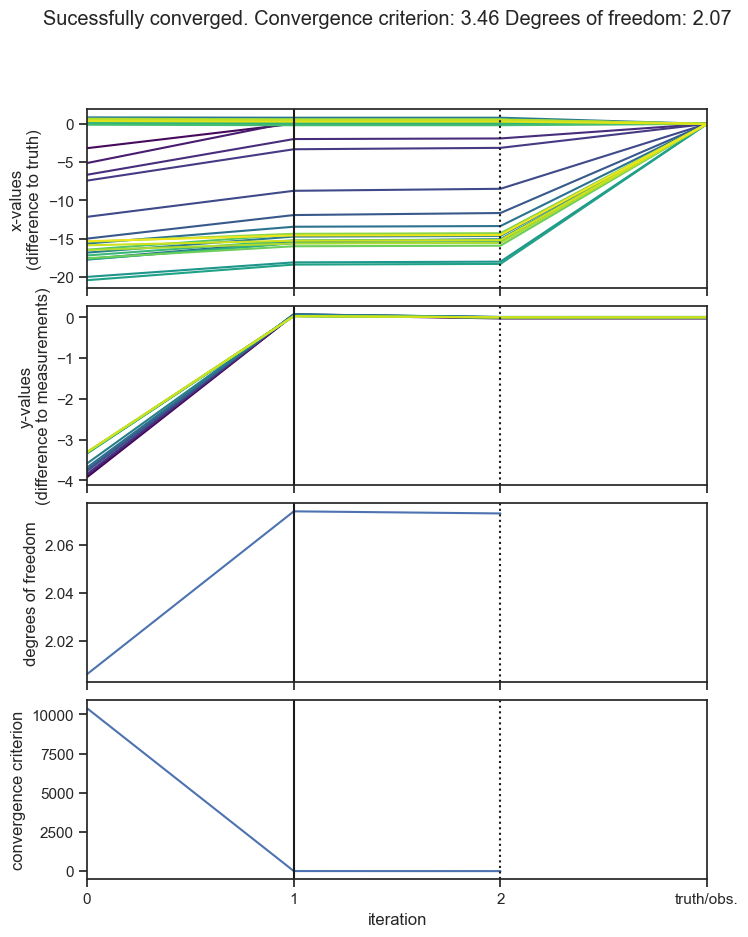

In [123]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [124]:
oe_ref.x_op

00000_q      1.785148
00000_t    302.747483
00194_q      1.766747
00194_t    303.826288
00539_q      1.768581
00539_t    300.847104
01134_q      1.792837
01134_t    296.617737
01896_q      1.805035
01896_t    291.274455
02581_q      1.793763
02581_t    286.913332
03198_q      1.780564
03198_t    282.293471
03203_q      1.776953
03203_t    281.611180
03687_q      1.753062
03687_t    278.319479
04202_q      1.735288
04202_t    275.297780
04714_q      1.710429
04714_t    272.164474
05234_q      1.679608
05234_t    269.671048
05751_q      1.649183
05751_t    267.269958
06256_q      1.608471
06256_t    264.847114
06729_q      1.572746
06729_t    262.612798
07134_q      1.552707
07134_t    260.648393
07443_q      1.514017
07443_t    258.866761
07646_q      1.526125
07646_t    257.811219
07814_q      1.512651
07814_t    256.272619
07855_q      1.510040
07855_t    255.737480
dtype: float64

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

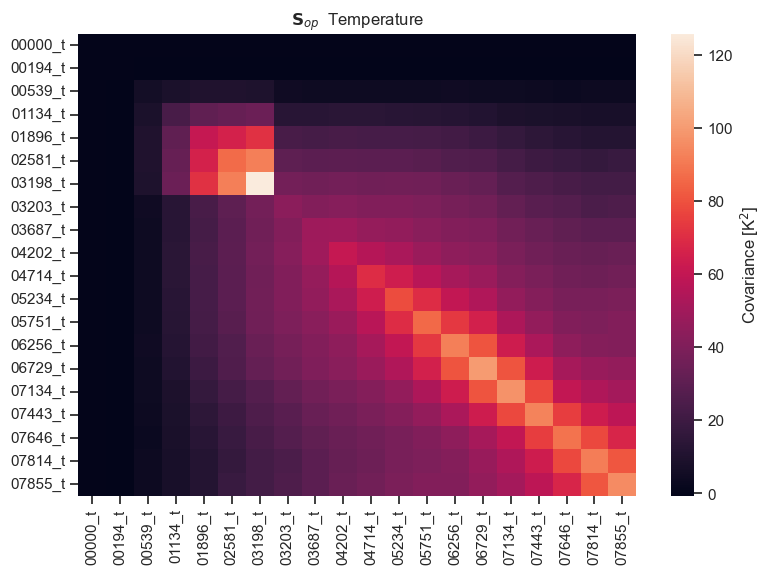

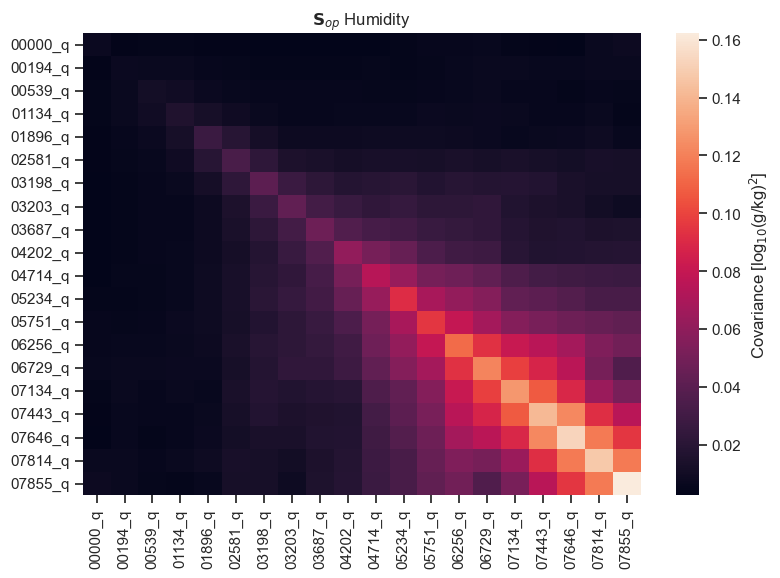

In [125]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [126]:
oe_ref.x_op_err

00000_q     0.083706
00000_t     0.114017
00194_q     0.086021
00194_t     0.309940
00539_q     0.105497
00539_t     2.499437
01134_q     0.125339
01134_t     4.812480
01896_q     0.164257
01896_t     7.791146
02581_q     0.182305
02581_t     9.296453
03198_q     0.202009
03198_t    11.216731
03203_q     0.206644
03203_t     6.584878
03687_q     0.217408
03687_t     7.018642
04202_q     0.246300
04202_t     7.801819
04714_q     0.272878
04714_t     8.340245
05234_q     0.302032
05234_t     8.859994
05751_q     0.308019
05751_t     9.268297
06256_q     0.335234
06256_t     9.578478
06729_q     0.348356
06729_t     9.990613
07134_q     0.357721
07134_t     9.865946
07443_q     0.376101
07443_t     9.640439
07646_q     0.390397
07646_t     9.420608
07814_q     0.384537
07814_t     9.562064
07855_q     0.402809
07855_t     9.781134
dtype: float64

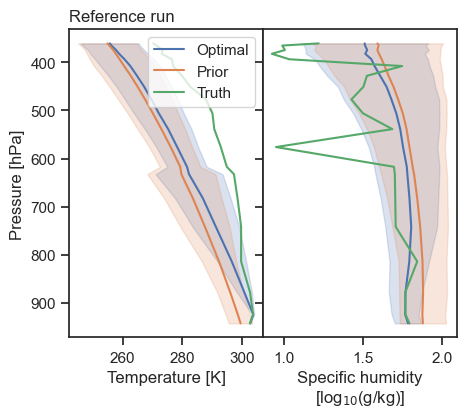

In [127]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [128]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 13.3197 [K]
RMS X Humidity: 18.456 [log$_{10}$(g/kg)]
RMS Y 0.00947948 [K]


In [129]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       


In [130]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [131]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [132]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as before
S_a = x_cov.sel(season='JJA')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [133]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.41 s, iteration 1, degrees of freedom: 2.17 of 40, converged (x-space):  1.208
0.63 s, iteration 2, degrees of freedom: 2.17 of 40, done.  0.000


True

In [134]:
oe_diag.dgf, oe_ref.dgf

(2.16554750699136, 2.0730618751486674)

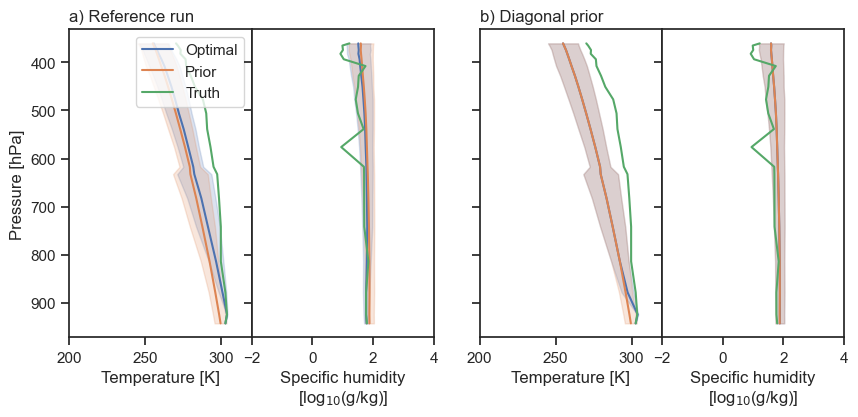

In [135]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [136]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 13.3197 [K]
RMS X Humidity: 18.456 [log$_{10}$(g/kg)]
RMS Y 0.00947948 [K]
Diagonal prior:
RMS X Temperature: 15.1645 [K]
RMS X Humidity: 23.7339 [log$_{10}$(g/kg)]
RMS Y 0.0186629 [K]


In [137]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [138]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [139]:
x_a = x_mean.sel(season='SON').to_pandas()
S_a = x_cov.sel(season='SON').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [140]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

0.42 s, iteration 1, degrees of freedom: 2.15 of 40, converged (x-space):  0.104


0.62 s, iteration 2, degrees of freedom: 2.15 of 40, done.  0.000


True

In [141]:
oe_ref.dgf, oe_sum.dgf

(2.0730618751486674, 2.14535767166452)

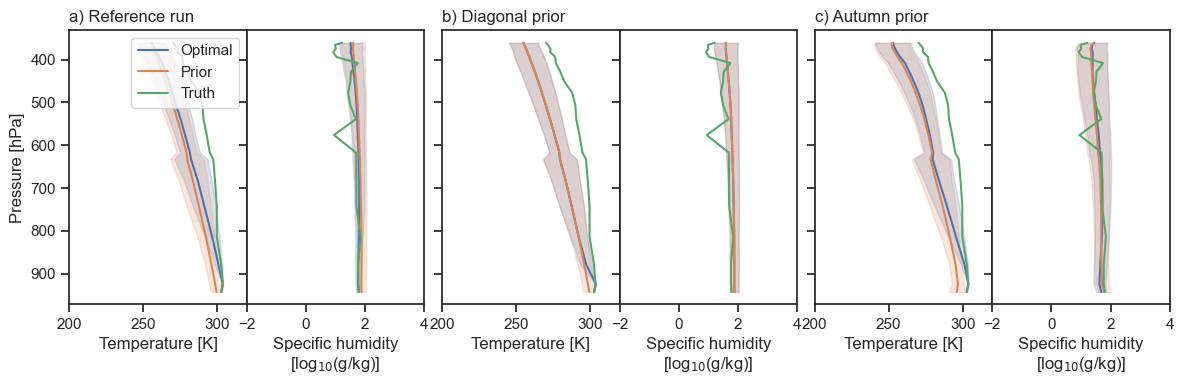

In [142]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Autumn prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [143]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Autumn prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 13.3197 [K]
RMS X Humidity: 18.456 [log$_{10}$(g/kg)]
RMS Y 0.00947948 [K]
Autumn prior:
RMS X Temperature: 14.7973 [K]
RMS X Humidity: 14.6319 [log$_{10}$(g/kg)]
RMS Y 0.00921847 [K]


In [144]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [145]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [146]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

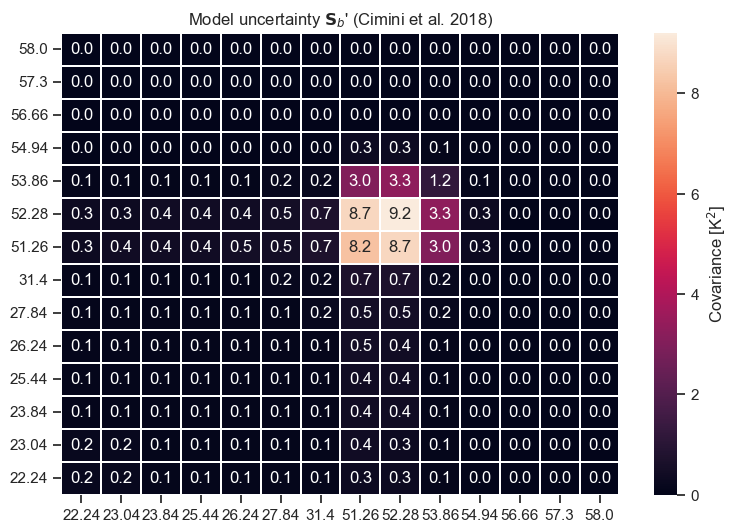

In [147]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [148]:
x_a = x_mean.sel(season='JJA').to_pandas() # as for the reference run
S_a = x_cov.sel(season='JJA').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.39 s, iteration 1, degrees of freedom: 1.80 of 40, converged (x-space):  0.055
0.58 s, iteration 2, degrees of freedom: 1.80 of 40, done.  0.000


True

In [149]:
oe_ref.dgf, oe_b.dgf

(2.0730618751486674, 1.8015146231041073)

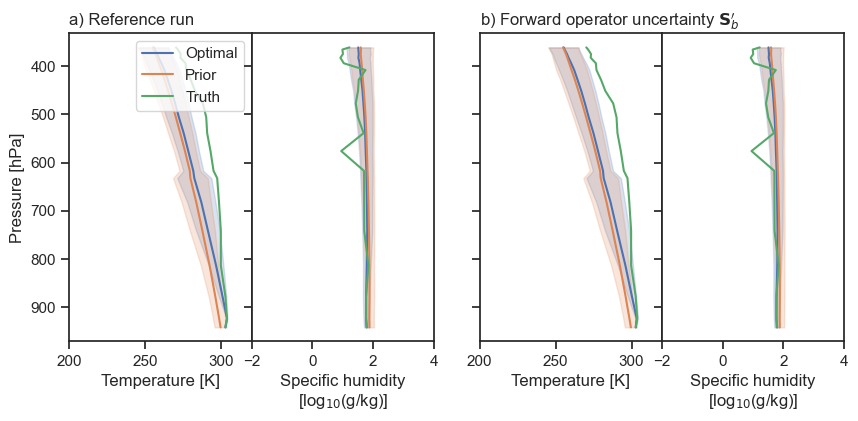

In [150]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [151]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 13.3197 [K]
RMS X Humidity: 18.456 [log$_{10}$(g/kg)]
RMS Y 0.00947948 [K]
Concidering forward model error:
RMS X Temperature: 13.665 [K]
RMS X Humidity: 18.3291 [log$_{10}$(g/kg)]
RMS Y 0.0755581 [K]


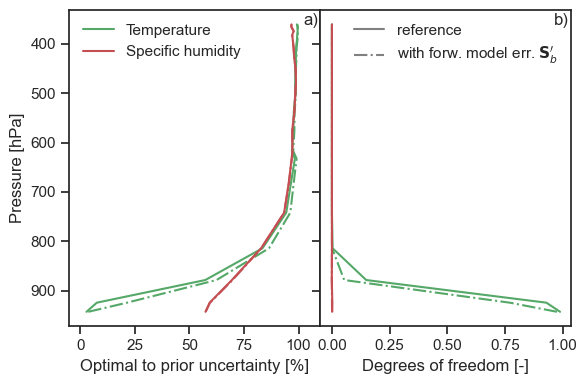

In [152]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['JJA'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [153]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

13.817872040023321

In [154]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.269738
Change in degrees of freedom for humidity variables 0.00180942


In [155]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation     True
Y_Observation_vs_Prior       True
Y_Optimal_vs_Prior          False
X_Optimal_vs_Prior           True
dtype: bool
Linearity test passed:  True


In [156]:
x_a = x_mean.sel(season='JJA').to_pandas() # as reference
S_a = x_cov.sel(season='JJA').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.38 s, iteration 1, degrees of freedom: 1.92 of 40, converged (x-space):  0.648
0.58 s, iteration 2, degrees of freedom: 1.92 of 40, done.  0.000


True

In [157]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.41 s, iteration 1, degrees of freedom: 2.31 of 40, not converged (x-space):  15.225
0.61 s, iteration 2, degrees of freedom: 2.31 of 40, converged (x-space):  0.000
0.81 s, iteration 3, degrees of freedom: 2.31 of 40, done.  0.000


True

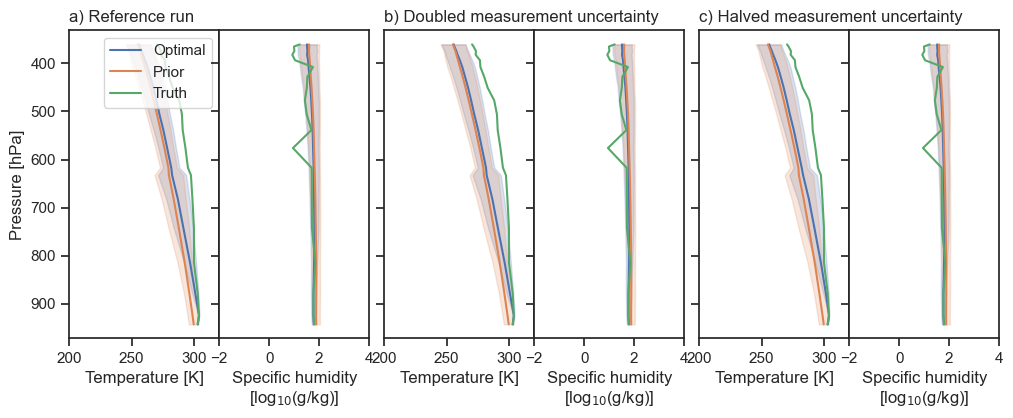

In [158]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [159]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 2.75441 [K]
Humidity RMS difference to x_a: 8.85161 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 2.55922 [K]
Humidity RMS difference to x_a: 8.96152 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 3.12657 [K]
Humidity RMS difference to x_a: 8.6756 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.237571
Change in degrees of freedom for doubled measurement uncertainties 0.155107


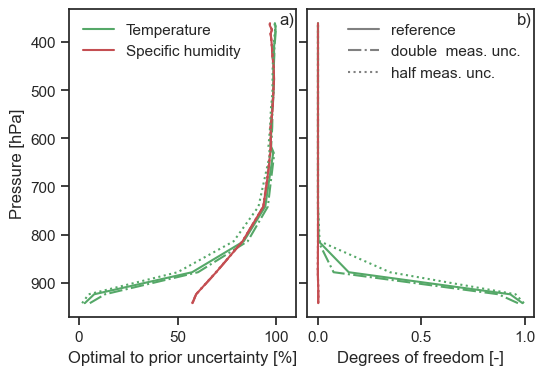

In [160]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['JJA'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [161]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation     True
Y_Observation_vs_Prior       True
Y_Optimal_vs_Prior          False
X_Optimal_vs_Prior           True
dtype: bool
Linearity test passed:  True


In [162]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

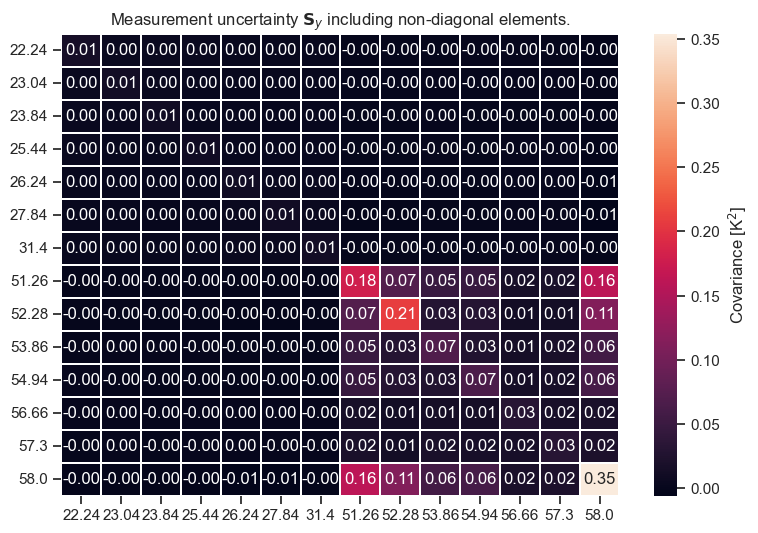

In [163]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [164]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.45 s, iteration 1, degrees of freedom: 2.04 of 40, converged (x-space):  1.575
0.67 s, iteration 2, degrees of freedom: 2.04 of 40, done.  0.000


True

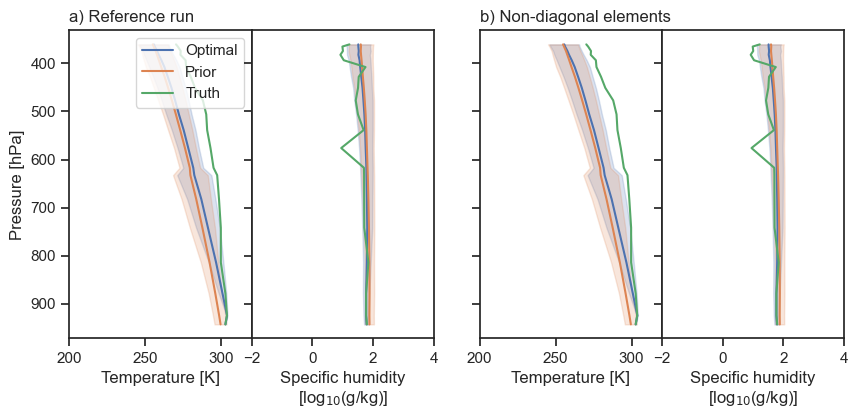

In [165]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [166]:
oe_nondiag.dgf - oe_ref.dgf

-0.03216466570782961

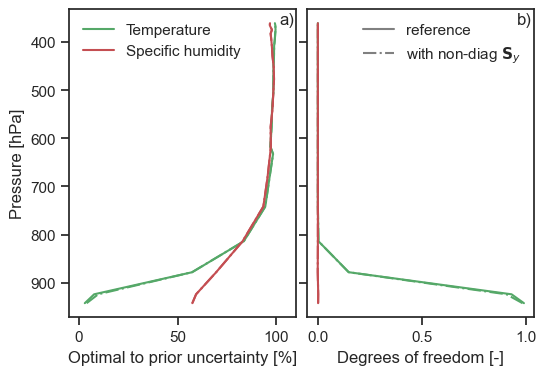

In [167]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['JJA'] / 100,
)

In [168]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [169]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as reference run
S_a = x_cov.sel(season='JJA').to_pandas()   # as reference run

In [170]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.45 s, iteration 1, degrees of freedom: 2.07 of 40, not converged (y-space):  36832.107
0.66 s, iteration 2, degrees of freedom: 2.07 of 40, converged (y-space):  0.476
0.87 s, iteration 3, degrees of freedom: 2.07 of 40, done.  0.000


True

In [171]:
oe_testy.dgf, oe_ref.dgf

(2.073061926331988, 2.0730618751486674)

In [172]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 13.3197 [K]
RMS X Humidity: 18.456 [log$_{10}$(g/kg)]
RMS Y 0.00947948 [K]
Test in y-space:
RMS X Temperature: 13.3202 [K]
RMS X Humidity: 18.4545 [log$_{10}$(g/kg)]
RMS Y 0.00949558 [K]


In [173]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [174]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True
